# Hands-on UMA Model for Catalysis:

**Presenter:** Muhammad H. M. Ahmed  
**Affiliation:** Materials Science & Engineering, KFUPM  
**LinkedIn:** 0533584744  
    **Phone:** www.linkedin.com/in/muhammad-h-m-ahmed/  
**Email:** g202318650@kfupm.edu.sa | husseinphysicist@gmail.com  
**Event:** 19th MECC Conference

**Goal of this tutorial:**  
A practical, end-to-end workflow for catalysis with **FairChem UMA**: bulk optimization, slab construction, adsorption screening, and **NEB** reaction pathway analysis (NH₃ → NH₂ + H).

**Benchmark reference to compare with:**  
Ammonia Adsorption and Decomposition on Co(0001) in Relation to Fischer–Tropsch Synthesis. A. C. (Ali Can) Kizilkaya, J. W. (Hans) Niemantsverdriet, and C. J. (Kees-Jan) Weststrate The Journal of Physical Chemistry C 2016 120 (7), 3834-3845 DOI: 10.1021/acs.jpcc.5b11609
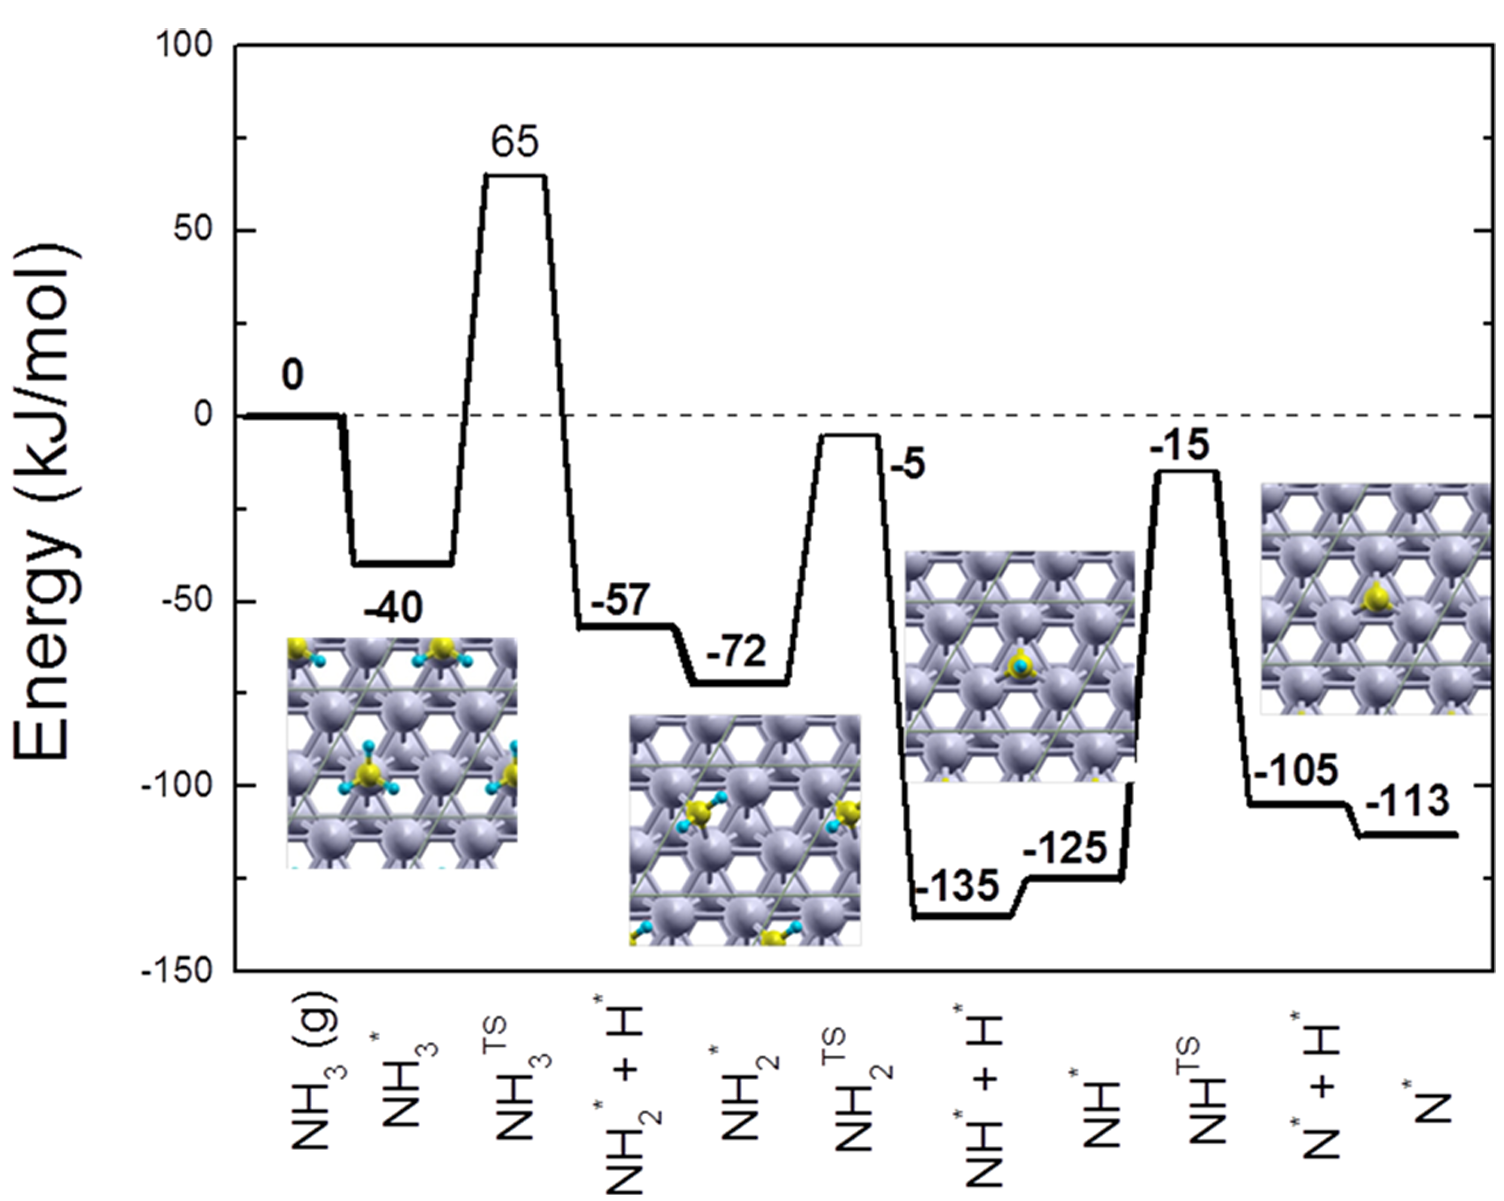

## Why NH₃ cracking matters
NH3 cracking is structurally and operationally important for corrosion; because it couples complex electrochemistry with real field failures across multiple sectors.
* **Mechanism:** NH3 can induce anodic hydrogen charging and protonic reactions that produce hydrogen stress cracking and stress‑corrosion cracking of steels in contaminated ammonia environments [1,2].
* **Industries affected:** Refinery process units including hydrocracking and treating systems are vulnerable to ammonia‑derived corrosive compounds and hydrogen‑induced cracking in service [3].
* **Economic impact:** Corrosion‑driven cracking in refinery treating systems has produced catastrophic failures with very large direct damage and production losses (example: a major amine‑unit rupture with ≈$500M damage and multiple fatalities) [4].
* **Safety concerns:** Ammonia SCC in storage and transport (nurse tanks, pressure vessels, pipelines) has caused leaks and explosive releases; SCC growth data are used to predict dangerous failures in ammonia tanks [5].
* **Middle East:** relevance Stress‑corrosion cracking in petroleum refining has been observed and studied in Gulf region refineries (Kuwait), demonstrating documented regional susceptibility and need for local technical exchange [6].


**You will learn to:**
- Set up UMA calculators (OMAT/OMOL/OC20)
- Optimize a bulk hcp-Co crystal and extract lattice constants  
- Build and relax a Co(0001) slab; compute surface energy  
- Optimize isolated reference molecules and compute adsorption energies  
- Screen adsorption sites and visualize stability via a heatmap  
- Construct and run an NEB (incl. climbing image) and plot the energy diagram

### References:
[1] “Corrosion in a Hydrocracking Unit”, [Online]. Available: https://onepetro.org/NACECORR/proceedings-abstract/CORR14/All-CORR14/122987 

[2] N. S. Syafei, D. Hidayat, E. Emilliano, and L. K. Men, “Analysis Cracking Corrosion on Carbon Steel Pipes API 5L-X65 In Solution 7700 ml Aquades, 250 ml Acetic Acid and 50 ml Ammonia with Gas CO2 and H2S in Saturation Condition,” vol. 19, no. 2, pp. 21–31, Oct. 2018, doi: 10.24036/EKSAKTA/VOL19 ISS2/138. 
 
 [3] “ROLE OF STAINLESS STEEL IN PETROLEUM REFINING”, [Online]. Available: https://nickelinstitute.org/media/4667/ni_aisi_9021_petroleumrefining.pdf 
 
 [4] “Fifty years of progress in the management of corrosion in the refinery industry”, doi: 10.1201/9781003580300-12. 
 
 [5] “Corrosion Mechanism and Countermeasures in Oil Refineries-Comprehensive Review:-Comprehensive Review”, [Online]. Available: https://www.jprs.gov.iq/index.php/jprs/article/view/707 
 
 [6] V. S. Agarwala, D. A. Berman, and G. Kohlhaas, “Causes and prevention of structural materials failures in naval environments,” Materials Performance, vol. 24, no. 6, pp. 9–16, Jan. 1984.

---


## 1) Environment Setup and Core Imports

**What this does:**  
Imports Python scientific stack (NumPy, Pandas, Matplotlib), **ASE** building/optimizers, **NGLView** for 3D structures, and **FairChem UMA** interfaces. Also sets figure defaults for consistency.

**Outputs:**  
- Confirms working directory and successful imports  
- Establishes global Matplotlib styling

**Tips:**  
If running on a fresh environment, ensure `fairchem`, `ase`, and `nglview` are installed and NGLView Jupyter extension is enabled.


In [1]:
# ==================== IMPORTS ====================
# OS / filesystem utilities
import os
from pathlib import Path           # object-oriented paths (safer than strings)
from datetime import datetime       # timestamps for filenames / logs
from copy import deepcopy           # safe structural copies of ASE Atoms, lists, dicts

# Core scientific stack
import numpy as np                  # arrays, linear algebra, numerics
import pandas as pd                 # tabular data (results tables, summaries)

# Plotting
import matplotlib as mpl            # low-level matplotlib config / backends
import matplotlib.pyplot as plt     # high-level plotting API
import matplotlib.patheffects as pe # text outline/glow effects for better readability

# Jupyter display helpers
from IPython.display import display, HTML  # rich output (styled tables, HTML blocks)

# -------------------- ASE (Atomic Simulation Environment) --------------------
from ase import Atoms                               # core atomic container
from ase.io import read, write                      # read/write structures (POSCAR, XYZ, etc.)
from ase.optimize import FIRE, BFGS, LBFGS          # geometry optimizers (local relaxation)
from ase.filters import FrechetCellFilter           # coupled atom+cell optimization wrapper
from ase.constraints import FixAtoms                # freeze selected atoms during relaxations
from ase.build import bulk, surface, hcp0001        # builders: bulk crystals, slabs, Co(0001)
from ase.mep import idpp_interpolate, NEB           # NEB tools: IDPP guess + NEB driver

# -------------------- FairChem UMA (machine-learned interatomic potentials) ---
from fairchem.core import FAIRChemCalculator, pretrained_mlip
# FAIRChemCalculator: ASE-compatible calculator wrapper
# pretrained_mlip: helper to load pretrained UMA models (OMAT/OMOL/OC20 families)
from fairchem.core.units.mlip_unit import load_predict_unit
# load_predict_unit: convenience to obtain a ready-to-use predictor/unit for inference

# -------------------- NGLView (3D structure visualization in notebooks) ------
import nglview as nv
from nglview.shape import Shape     # draw arrows/planes/labels on top of structures

# -------------------- Matplotlib defaults (publication-quality figures) ------
plt.rcParams['figure.dpi'] = 150     # crisper on-screen figures
plt.rcParams['savefig.dpi'] = 300    # high-res saved images for slides/papers
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12

# Sanity prints: confirm environment and working directory
print("✅ All libraries imported successfully!")
print(f"📁 Working directory: {os.getcwd()}")

W1114 02:29:40.596000 46052 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


✅ All libraries imported successfully!
📁 Working directory: c:\Users\mfree\Desktop\Research\MECCE Workshop\MECCE-Hands-on\1-Catalysis_Hands_on


## 2) UMA Calculators and Utility Helpers

**What this does:**  
- Loads a shared UMA predictor and three task-specific calculators: **OMAT**, **OMOL**, **OC20** (via `load_uma_calculators`)  
- Imports helper utilities for: NGLView visualization, structured site placement, slab constraints, and plotting

**Outputs:**  
- `predictor`, `omat_calculator`, `omol_calculator`, `oc20_calculator`


In [2]:
# ==================== UTILITY FUNCTIONS & CALCULATORS ====================
# All helpers live in `utility.py` (keeps the notebook lean and reusable).
# Refer to the provided `utility.py` for implementation details; brief roles:
# - load_uma_calculators: returns a shared UMA predictor + dict of ASE calculators
# - view_structure_ngl: NGLView wrapper with good defaults for 3D inspection
# - make_sites_xyz: lift 2D (x,y) site coords to 3D by adding a height above the slab
# - place_adsorbate_at_xyz: place/anchor an adsorbate at a target 3D coordinate
# - get_bottom_layer_constraint: build FixAtoms constraint for bottom fraction of slab
# - plot_adsorption_heatmap: draw site×molecule energy heatmap
# - plot_neb_energy_diagram: compact NEB (Initial/TS/Final) energy diagram
# - pick_site_by_name: Return (site_name, record) for a requested site.

from utility import (
    load_uma_calculators,
    view_structure_ngl,
    make_sites_xyz,
    place_adsorbate_at_xyz,
    get_bottom_layer_constraint,
    plot_adsorption_heatmap,
    plot_neb_energy_diagram,
    pick_site_by_name
)

# --- Load UMA calculators ------------------------------------------------------
# In `utility.load_uma_calculators`, we:
#   • create a shared predictor via pretrained_mlip.get_predict_unit("uma-s-1p1", device="cpu")
#   • wrap it into ASE-compatible calculators for each task name ("omat","omol","oc20")
# Notes:
#   - Device is "cpu" in utility.py for portability during workshops.
#     If you have a GPU, you can switch to device="cuda" there.
#   - Using a *shared* predictor keeps memory usage lower when multiple calculators are active.

print("Loading UMA calculators...")
predictor, calculators = load_uma_calculators()

# Named handles for clarity downstream:
#   OMAT → materials focus (bulk/slabs)
#   OMOL → molecules (gas-phase references)
#   OC20 → catalyst + adsorbate coverage (good default for adsorption/NEB on surfaces)
omat_calculator = calculators["omat"]
omol_calculator = calculators["omol"]
oc20_calculator = calculators["oc20"]

# Quick sanity message so users know which families are available
print("UMA calculators ready: OMAT, OMOL, OC20")

Loading UMA calculators...
UMA calculators ready: OMAT, OMOL, OC20


## 3) Optimize Bulk hcp Co and Save Structure

**Objective:**  
Build and relax the **hcp Co** bulk crystal; extract optimized **a** and **c** lattice parameters and per-atom energy.

**How it works:**  
- Construct hcp Co with an initial guess (a=2.507 Å, c/a≈1.623)  
- Use **LBFGS** with **FrechetCellFilter** to co-optimize ions and cell  
- Compute total energy, energy/atom, and final lattice constants  
- Save to `Bulk_Co.vasp` and preview in 3D (NGLView)

**You get:**  
- Optimized bulk energy (eV), **a** (Å), **c** (Å)  
- A VASP-format structure for downstream slab construction


In [3]:
# ---- Relax bulk hcp cobalt and store the optimized structure -----------------

a = 2.507
# Build an hcp Co primitive cell with initial guess (c/a ≈ 1.623 for hcp metals)
bulk_co = bulk("Co", crystalstructure="hcp", a=a, c=a * 1.623)

# Attach the UMA materials calculator (OMAT) to compute energies/forces/stresses
bulk_co.calc = omat_calculator

print("\nOptimizing bulk Co structure...")

# Use a cell+atomic DOF filter so the optimizer can change both lattice and positions
# FrechetCellFilter couples atomic and cell degrees of freedom for variable-cell relaxations.
cell_filter = FrechetCellFilter(bulk_co)

# LBFGS is a robust quasi-Newton optimizer; fmax=0.02 eV/Å is a typical tight stopping criterion
optimizer = LBFGS(cell_filter)
optimizer.run(fmax=0.02, steps=300)  # increase steps if needed for tighter convergence

# --- Energetics and lattice constants after relaxation
bulk_energy = bulk_co.get_potential_energy()           # total energy of relaxed cell (eV)
energy_per_atom = bulk_energy / len(bulk_co)           # convenience scalar for surfaces (eV/atom)

# cellpar() returns [a, b, c, alpha, beta, gamma]; we extract a and c
cell_a, cell_c = bulk_co.cell.cellpar()[0], bulk_co.cell.cellpar()[2]

print(
    f"\nOptimized bulk Co energy: {bulk_energy:.3f} eV"
    f"\nEnergy per atom: {energy_per_atom:.3f} eV/atom"
    f"\nOptimized lattice parameter a: {cell_a:.3f} Å"
    f"\nOptimized lattice parameter c: {cell_c:.3f} Å"
)

# --- Save the relaxed bulk structure
output_file = "Bulk_Co.vasp"  # VASP POSCAR-format (vasp5=True writes 5.x style with element line)
write(output_file, bulk_co, format="vasp", direct=True, vasp5=True)
print(f"\nOptimized structure saved as '{output_file}'")

# Quick 3D preview (orthographic camera, unit cell shown if PBC set)
display(view_structure_ngl(bulk_co))


Optimizing bulk Co structure...
       Step     Time          Energy          fmax
LBFGS:    0 02:29:46      -14.060558        0.589412
LBFGS:    1 02:29:46      -14.065816        0.446147
LBFGS:    2 02:29:46      -14.069707        0.329841
LBFGS:    3 02:29:46      -14.071002        0.141312
LBFGS:    4 02:29:46      -14.071599        0.093328
LBFGS:    5 02:29:46      -14.072344        0.019837

Optimized bulk Co energy: -14.072 eV
Energy per atom: -7.036 eV/atom
Optimized lattice parameter a: 2.509 Å
Optimized lattice parameter c: 3.991 Å

Optimized structure saved as 'Bulk_Co.vasp'


NGLWidget(layout=Layout(height='600px', width='100%'))

## 4) Construct Co(0001) Slab and Compute Surface Energy

**Objective:**  
Generate a relaxed **Co(0001)** slab with vacuum and constrained bottom layers; evaluate **surface energy**.

**Steps:**  
1. Build an hcp(0001) slab from bulk lattice (`a`, `c`) with target size and vacuum  
2. Constrain bottom 2 layers atoms to emulate bulk anchoring  
3. Relax with **LBFGS** using the **OC20** UMA calculator  
4. Compute surface energy:
   $$\frac{E_{slab} − N·E_{bulk_atom}}{2A}, [eV/Å²]$$

**You get:**  
- Relaxed slab energy and geometry  
- Estimated vacuum gap, fixed indices count  
- Surface energy in two unit systems  
- 3D viewer for the slab


In [4]:
print("Preparing Co(0001) surface...")

# --- Build an hcp Co(0001) slab ------------------------------------------------
surface_size = (4, 4, 5)     # (nx, ny, nlayers): 4×4 in-plane repeats, 5 atomic layers along z
vacuum_thickness = 10.0      # Å of vacuum along z to decouple periodic images

# hcp0001 builder: uses the relaxed bulk (cell_a, cell_c) so slab is consistent with bulk
slab = hcp0001("Co", size=surface_size, a=cell_a, c=cell_c,
               vacuum=vacuum_thickness, periodic=True)

# Center along z so the slab sits in the middle of the cell (vacuum split above/below)
slab.center(axis=2)

# --- Diagnostics: estimate the actual vacuum gap after centering ---------------
z_positions = slab.positions[:, 2]
# Geometric slab thickness (top z - bottom z)
slab_thickness = z_positions.max() - z_positions.min()
# Cell z-length minus slab thickness ≈ total vacuum thickness (both sides combined)
vacuum_gap = slab.cell.lengths()[2] - slab_thickness

# --- Constraints: freeze bottom ~40% of atoms to mimic a semi-infinite solid ---
slab_constraint, slab_fixed_indices = get_bottom_layer_constraint(slab, fix_fraction=0.4)
slab_fixed_indices = slab_fixed_indices.tolist()
slab.set_constraint(slab_constraint)

print(
    f"Created {len(slab)}-atom slab with cell lengths "
    f"{[f'{length:.3f}' for length in slab.cell.lengths()]}"
    f"\nEstimated vacuum gap: ~{vacuum_gap:.1f} A"
    f"\nFixed {len(slab_fixed_indices)} atoms in the bottom layers"
)

# --- Calculator: OC20 model for surfaces+adsorbates ----------------------------
slab.calc = oc20_calculator

# Initial single-point energy before relaxation (useful for logs)
initial_energy = slab.get_potential_energy()
print(f"\nInitial slab energy: {initial_energy:.3f} eV")

# --- Surface relaxation (atomic positions only; cell is fixed for a clean γ) ---
print("Optimizing surface...")
optimizer = LBFGS(slab)
optimizer.run(fmax=0.02, steps=300)   # tighten fmax if needed; add steps if not converged

# Total energy after relaxation
slab_energy = slab.get_potential_energy()
print(f"\nOptimized slab energy: {slab_energy:.3f} eV")

# --- Surface energy γ calculation ----------------------------------------------
# In-plane area A = || a × b || (Å²)
area = np.linalg.norm(np.cross(slab.cell[0], slab.cell[1]))

# Symmetric slab assumption: two equivalent surfaces → divide by 2*A
# γ [eV/Å²] = (E_slab - N * E_bulk_atom) / (2A)
surface_energy_ev_per_a2 = (slab_energy - len(slab) * energy_per_atom) / (2.0 * area)

print(
    f"\n{'=' * 80}"
    f"\n--- Surface energy results (Co(0001)) ---"
    f"\n{'=' * 80}"
    f"\nAtoms in slab:           {len(slab)}"
    f"\nIn-plane area A (A^2):   {area:.6f}"
    f"\nE_bulk per atom (eV):    {energy_per_atom:.6f}"
    f"\nE_slab (optimized) (eV): {slab_energy:.6f}"
    f"\nSurface energy (eV/A^2): {surface_energy_ev_per_a2:.6f}"
)

# --- Save the relaxed slab structure
output_file = "Slab0001_Co.vasp"  # VASP POSCAR-format (vasp5=True writes 5.x style with element line)
write(output_file, slab, format="vasp", direct=True, vasp5=True)
print(f"\nOptimized structure saved as '{output_file}'")

# 3D preview of the relaxed surface (bottom atoms fixed per constraint)
display(view_structure_ngl(slab))

Preparing Co(0001) surface...
Created 80-atom slab with cell lengths ['10.037', '10.037', '27.981']
Estimated vacuum gap: ~20.0 A
Fixed 32 atoms in the bottom layers

Initial slab energy: -475.788 eV
Optimizing surface...
       Step     Time          Energy          fmax
LBFGS:    0 02:29:48     -475.788211        0.376045
LBFGS:    1 02:29:49     -475.825977        0.337156
LBFGS:    2 02:29:50     -475.936269        0.184138
LBFGS:    3 02:29:51     -475.943578        0.142130
LBFGS:    4 02:29:52     -475.960018        0.103931
LBFGS:    5 02:29:53     -475.988912        0.129372
LBFGS:    6 02:29:54     -476.017200        0.130444
LBFGS:    7 02:29:55     -476.033178        0.141701
LBFGS:    8 02:29:56     -476.045063        0.116158
LBFGS:    9 02:29:57     -476.050989        0.095014
LBFGS:   10 02:29:58     -476.058818        0.058677
LBFGS:   11 02:29:59     -476.065651        0.035787
LBFGS:   12 02:30:00     -476.067970        0.011076

Optimized slab energy: -476.068 eV

-

NGLWidget(layout=Layout(height='600px', width='100%'))

## 5) Optimize Isolated Reference Molecules

**Objective:**  
Obtain reliable reference energies for **NH₃**, **NH₂**, and **H₂** in the gas phase.

**Method:**  
- Load molecules from files  
- Assign charges/spins where applicable  
- Relax multi-atom species with **FIRE** (single-atom H is added later as needed)  
- Record energies for adsorption/reaction thermochemistry

**Outputs:**  
- `molecule_energies` dictionary with eV values  
- 3D previews of all relaxed molecules


In [5]:
# ---- Load and relax isolated reference molecules -----------------------------
# Each tuple: (label, file path, total charge, spin multiplicity)
molecule_specs = [
    ("NH3", "Isolated_Molecules/NH3/NH3.vasp",   0, 1),  # closed-shell
    ("NH2", "Isolated_Molecules/NH2/NH2.vasp",   0, 2),  # doublet radical
    ("H2",  "Isolated_Molecules/H2/H2.vasp",   0, 1),  # closed-shell
]

# Read molecular geometries from disk
molecules = {name: read(path) for name, path, *_ in molecule_specs}

# Dict to store relaxed absolute energies (eV) for each reference molecule
molecule_energies = {}

print(
    f"\n{'='*80}"
    f"\nOptimizing isolated molecules"
    f"\n{'='*80}"
)

for name, _, charge, spin in molecule_specs:
    mol = molecules[name]
    formula = mol.get_chemical_formula()
    print(f"\n{name} ({formula}) — charge {charge}, spin {spin}")

    # Record charge/spin in .info (useful metadata for downstream reporting)
    mol.info.update(charge=charge, spin=spin)
    
    # --- Calculator choice for gas-phase references ---------------------------
    # Option A (current): OC20 (general-purpose surface/adsorbate coverage)
    mol.calc = oc20_calculator
    # Option B (alternative): OMOL (molecule-focused); uncomment to use instead
    # mol.calc = omol_calculator

    # --- Geometry relaxation (skip for monatomic species) ---------------------
    # FIRE is fast and robust for small molecules; fmax=0.02 eV/Å is fairly tight.
    if len(mol) > 1:
        FIRE(mol).run(fmax=0.02, steps=200)

    # Absolute energy after relaxation (eV)
    energy = mol.get_potential_energy()
    molecule_energies[name] = energy
    print(f"Energy: {energy:.3f} eV")
    
    # --- Save the relaxed molecule structure
    output_file = os.path.join("./Isolated_Molecules", name, f"{name}.vasp")  # VASP POSCAR-format
    write(output_file, mol, format="vasp", direct=True, vasp5=True)
    print(f"\nOptimized structure saved as '{output_file}'")

    # 3D preview of the relaxed molecule
    display(view_structure_ngl(mol))

# Summary table for reference energies (used later in adsorption energies)
print("\nIsolated molecule energies:")
for name, energy in molecule_energies.items():
    print(f"  {name}: {energy:.3f} eV")


Optimizing isolated molecules

NH3 (H3N) — charge 0, spin 1
      Step     Time          Energy          fmax
FIRE:    0 02:30:01      -19.389710        0.019976
Energy: -19.390 eV

Optimized structure saved as './Isolated_Molecules\NH3\NH3.vasp'


NGLWidget(layout=Layout(height='600px', width='100%'))


NH2 (H2N) — charge 0, spin 2
      Step     Time          Energy          fmax
FIRE:    0 02:30:01      -12.754106        0.019560
Energy: -12.754 eV

Optimized structure saved as './Isolated_Molecules\NH2\NH2.vasp'


NGLWidget(layout=Layout(height='600px', width='100%'))


H2 (H2) — charge 0, spin 1
      Step     Time          Energy          fmax
FIRE:    0 02:30:01       -6.966358        0.013460
Energy: -6.966 eV

Optimized structure saved as './Isolated_Molecules\H2\H2.vasp'


NGLWidget(layout=Layout(height='600px', width='100%'))


Isolated molecule energies:
  NH3: -19.390 eV
  NH2: -12.754 eV
  H2: -6.966 eV


## 6) Screen Adsorption Sites on Co(0001)

**Objective:**  
Evaluate **NH₃**, **NH₂**, and **H** adsorption energies over predefined sites: `atop`, `bridge`, `fcc`, `hcp`.
* atop: Adsorbate sits directly above a single surface atom.
* bridge: Centered between two adjacent surface atoms along a close-packed row.
* fcc hollow: Threefold hollow where the vertical projection passes over a third-layer vacancy.
* hcp hollow: Threefold hollow where the projection sits above a second-layer atom.

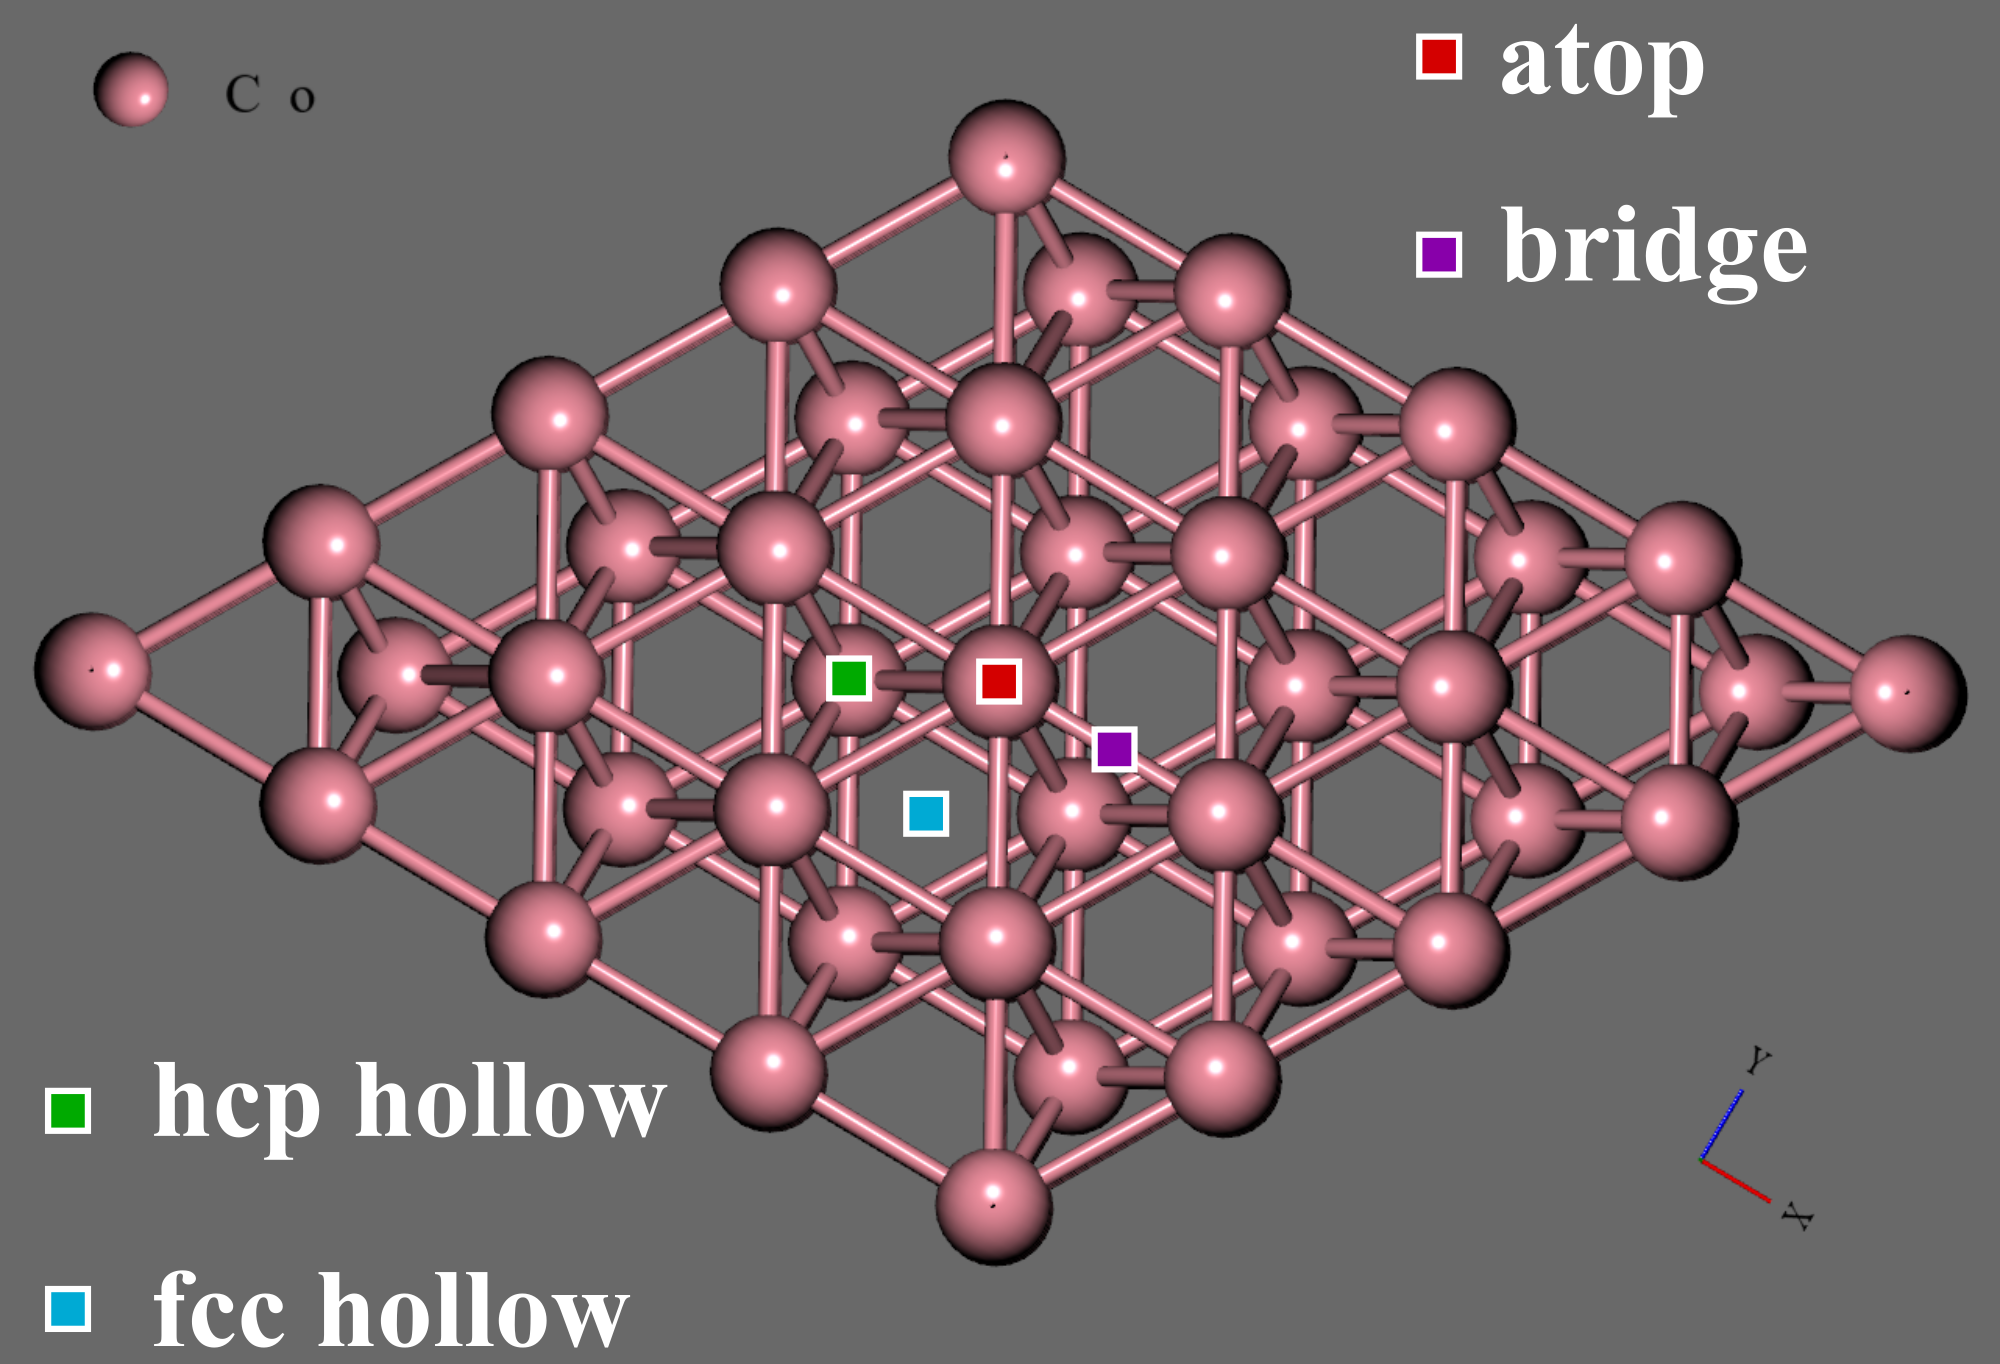

**Workflow:**  
1. Convert the predefined 2D site coordinates to 3D targets above the slab top  
2. Place each adsorbate (COM-anchored) at each site  
3. Apply bottom-layer constraints and relax short runs (site screening)  
4. Compute adsorption energy:  
   - For H: $$ E_{ads} = E_{total} − E_{slab} − (\frac{E_{H2}}{2}) $$  
   - Otherwise: $$ E_{ads} = E_{total} − E_{slab} − E_{molecule} $$

**You get:**  
- Per-site adsorption energies (eV) per molecule  
- Visual previews of relaxed adsorbate–slab structures  
- Identification of the most stable site per adsorbate


In [6]:
# ---- Define named surface sites (2D in-plane coordinates in Å) ---------------
# These (x, y) positions are on the top surface of the relaxed slab cell;
# we'll lift them to 3D by adding a height above the topmost z later.
sites_xy = {
    "atop":   [7.521000, 4.342251],   # directly above a surface Co atom (1-fold)
    "bridge": [6.894250, 3.256689],   # midway between two surface Co atoms (2-fold)
    "hcp":    [6.267500, 3.618542],   # 3-fold hollow, hcp registry (subsurface atom underneath)
    "fcc":    [12.534999, 2.890807],  # 3-fold hollow, fcc registry (subsurface vacancy)
}

# ---- Add a monatomic hydrogen "molecule" for adsorption tests ----------------
# Place H at origin and give it vacuum so it's well-separated when viewed alone.
molecules["H"] = Atoms("H", positions=[(0.0, 0.0, 0.0)])
molecules["H"].center(vacuum=8.0)

def create_relax_ads_configs(
    slab,
    constraint,
    slab_energy,
    molecules,
    molecule_energies,
    adsorbates=("NH3", "NH2", "H"),
    height=2,
    relax_fmax=0.02,
    relax_steps=20,
):
    """
    Relax adsorbates on named surface sites and return adsorption energies.

    Parameters
    ----------
    slab : ase.Atoms
        Pre-relaxed surface slab (calculator may be attached externally).
    constraint : ase.constraints.FixAtoms
        Constraint object to freeze bottom layers during adsorption relaxations.
    slab_energy : float
        Total energy (eV) of the relaxed clean slab used as reference.
    molecules : dict[str, ase.Atoms]
        Dictionary of gas-phase adsorbates (e.g., {"NH3": Atoms(...), ...}).
    molecule_energies : dict[str, float]
        Relaxed absolute energies (eV) of the isolated reference molecules.
        NOTE: For H adsorption, 1/2 * E(H2) is used as the reference.
    adsorbates : tuple[str, ...]
        Names of adsorbates to screen.
    height : float
        Initial vertical placement (Å) above the topmost surface atom.
    relax_fmax : float
        Force convergence threshold (eV/Å) for the local LBFGS relaxations.
    relax_steps : int
        Maximum number of LBFGS steps per site.

    Returns
    -------
    dict
        Nested mapping: results[molecule][site] = {"energy": E_ads, "structure": Atoms}
        where E_ads = E(slab+ads) - E(slab) - E(reference).
    """
    # Lift the 2D (x, y) site coordinates into 3D targets by adding a fixed z-height.
    sites = make_sites_xyz(slab.copy(), sites_xy, height=height)

    print("Adsorption site coordinates (A):")
    for name, coords in sites.items():
        print(f"  {name:<6} {coords.tolist()}")

    results = {}

    # Loop over requested adsorbates (NH3, NH2, H by default)
    for mol_name in adsorbates:
        print(
            f"\n{'=' * 80}"
            f"\nScreening {mol_name} adsorption"
            f"\n{'=' * 80}"
        )

        # Gas-phase reference energy:
        #  - For H*, conventionally use 1/2 * E(H2)
        #  - Otherwise use E(molecule) from molecule_energies
        reference = molecule_energies["H2"] / 2 if mol_name == "H" else molecule_energies[mol_name]
        results[mol_name] = {}
        
        # Try each named site (atop/bridge/hcp/fcc) for this adsorbate
        for site_name, coords in sites.items():
            # Construct slab+adsorbate: place the molecule at target coords using its COM
            slab_adsorbate = place_adsorbate_at_xyz(slab, molecules[mol_name].copy(), coords, anchor="com")

            # Apply the same bottom-layer constraint used for the clean slab relaxations
            slab_adsorbate.set_constraint(constraint)

            # Attach surface-capable calculator (OC20 here) to evaluate forces/energies
            slab_adsorbate.calc = oc20_calculator

            print(f"Relaxing {mol_name} on {site_name}: ")
            # Local relaxation of the adsorbate+top layers (bottom layers are fixed)
            LBFGS(slab_adsorbate).run(fmax=relax_fmax, steps=relax_steps)

            # Adsorption energy: E(slab+ads) - E(slab) - E(reference)
            total_energy = slab_adsorbate.get_potential_energy()
            adsorption_energy = total_energy - slab_energy - reference

            # Store both the energy and a copy of the relaxed structure for later inspection
            results[mol_name][site_name] = {
                "energy": adsorption_energy,
                "structure": slab_adsorbate.copy()
            }
            print(f"  {site_name:<8} E_ads = {adsorption_energy:+.3f} eV")

            # --- Save the relaxed adsorption structure
            output_dir = f"./Relaxed_Ads_Config/{mol_name}/{site_name}/"
            os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
            output_file = os.path.join(output_dir, f"{mol_name}_at_{site_name}.vasp")  # VASP POSCAR-format
            write(output_file, slab_adsorbate, format="vasp", direct=True, vasp5=True)
            print(f"\nOptimized structure saved as '{output_file}'")
    
            # Quick visual check for geometry/sanity at each site
            display(view_structure_ngl(slab_adsorbate))

    return results


print("Starting adsorption site screening...")

# Run the screen on a *copy* of the relaxed slab (to keep the original pristine)
adsorption_results = create_relax_ads_configs(
    slab.copy(),
    constraint=slab_constraint,          # freeze bottom ~40% of atoms
    slab_energy=slab_energy,             # reference: optimized clean slab energy
    molecules=molecules,                 # dict of ASE Atoms objects for NH3, NH2, H, etc.
    molecule_energies=molecule_energies, # dict of gas-phase reference energies
    adsorbates=("NH3", "NH2", "H"),      # which species to screen
)

# ---- Summary printout of per-site adsorption energies ------------------------
print(
    f"\n{'=' * 80}"
    f"\nAdsorption energy summary"
    f"\n{'=' * 80}"
)
for mol_name, entries in adsorption_results.items():
    print(f"{mol_name}:")
    for site, record in entries.items():
        print(f"  {site:8s}: {record['energy']:+.3f} eV")

Starting adsorption site screening...
Adsorption site coordinates (A):
  atop   [7.521, 4.342251, 19.85750253806092]
  bridge [6.89425, 3.256689, 19.85750253806092]
  hcp    [6.2675, 3.618542, 19.85750253806092]
  fcc    [12.534999, 2.890807, 19.85750253806092]

Screening NH3 adsorption
Relaxing NH3 on atop: 
       Step     Time          Energy          fmax
LBFGS:    0 02:30:02     -495.891581        1.396670
LBFGS:    1 02:30:03     -495.927972        0.851729
LBFGS:    2 02:30:05     -496.000407        0.394737
LBFGS:    3 02:30:06     -496.014157        0.333243
LBFGS:    4 02:30:07     -496.023818        0.292972
LBFGS:    5 02:30:08     -496.037314        0.332138
LBFGS:    6 02:30:09     -496.052014        0.293620
LBFGS:    7 02:30:10     -496.064265        0.385745
LBFGS:    8 02:30:12     -496.075728        0.368230
LBFGS:    9 02:30:13     -496.087121        0.240706
LBFGS:   10 02:30:14     -496.097237        0.245148
LBFGS:   11 02:30:15     -496.105082        0.164115
LB

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing NH3 on bridge: 
       Step     Time          Energy          fmax
LBFGS:    0 02:30:26     -495.407624        0.802566
LBFGS:    1 02:30:27     -495.433541        0.635851
LBFGS:    2 02:30:29     -495.507756        0.288019
LBFGS:    3 02:30:30     -495.512232        0.248616
LBFGS:    4 02:30:31     -495.520066        0.276125
LBFGS:    5 02:30:32     -495.528575        0.290001
LBFGS:    6 02:30:33     -495.536046        0.230613
LBFGS:    7 02:30:35     -495.539334        0.135724
LBFGS:    8 02:30:36     -495.541503        0.159219
LBFGS:    9 02:30:37     -495.544827        0.257035
LBFGS:   10 02:30:38     -495.549670        0.317337
LBFGS:   11 02:30:39     -495.554324        0.254991
LBFGS:   12 02:30:40     -495.557286        0.125062
LBFGS:   13 02:30:41     -495.559582        0.118940
LBFGS:   14 02:30:43     -495.562251        0.155028
LBFGS:   15 02:30:44     -495.565911        0.224724
LBFGS:   16 02:30:45     -495.570159        0.207488
LBFGS:   17 02:30:46   

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing NH3 on hcp: 
       Step     Time          Energy          fmax
LBFGS:    0 02:30:50     -495.249856        0.931317
LBFGS:    1 02:30:52     -495.268094        0.713252
LBFGS:    2 02:30:53     -495.322577        0.218339
LBFGS:    3 02:30:54     -495.327954        0.238840
LBFGS:    4 02:30:55     -495.333756        0.266857
LBFGS:    5 02:30:56     -495.345914        0.292095
LBFGS:    6 02:30:57     -495.364434        0.269104
LBFGS:    7 02:30:59     -495.384396        0.211470
LBFGS:    8 02:31:00     -495.398024        0.195853
LBFGS:    9 02:31:01     -495.406224        0.279785
LBFGS:   10 02:31:02     -495.417649        0.387471
LBFGS:   11 02:31:03     -495.435107        0.380188
LBFGS:   12 02:31:04     -495.451472        0.241875
LBFGS:   13 02:31:05     -495.462119        0.138587
LBFGS:   14 02:31:07     -495.470435        0.127137
LBFGS:   15 02:31:08     -495.477156        0.103042
LBFGS:   16 02:31:09     -495.483702        0.128763
LBFGS:   17 02:31:10     -

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing NH3 on fcc: 
       Step     Time          Energy          fmax
LBFGS:    0 02:31:14     -495.365607        0.496591
LBFGS:    1 02:31:16     -495.382058        0.466750
LBFGS:    2 02:31:17     -495.428887        0.173779
LBFGS:    3 02:31:18     -495.431843        0.155141
LBFGS:    4 02:31:19     -495.434373        0.154992
LBFGS:    5 02:31:20     -495.437659        0.178970
LBFGS:    6 02:31:22     -495.442330        0.210023
LBFGS:    7 02:31:23     -495.446517        0.176123
LBFGS:    8 02:31:24     -495.449145        0.161432
LBFGS:    9 02:31:25     -495.451783        0.287778
LBFGS:   10 02:31:26     -495.456965        0.415205
LBFGS:   11 02:31:27     -495.464894        0.445989
LBFGS:   12 02:31:28     -495.473696        0.309107
LBFGS:   13 02:31:30     -495.480460        0.111004
LBFGS:   14 02:31:31     -495.485879        0.129515
LBFGS:   15 02:31:32     -495.491528        0.278943
LBFGS:   16 02:31:33     -495.498048        0.332716
LBFGS:   17 02:31:34     -

NGLWidget(layout=Layout(height='600px', width='100%'))


Screening NH2 adsorption
Relaxing NH2 on atop: 
       Step     Time          Energy          fmax
LBFGS:    0 02:31:39     -491.365292        1.800391
LBFGS:    1 02:31:40     -491.431343        1.512673
LBFGS:    2 02:31:41     -491.556147        0.510019
LBFGS:    3 02:31:42     -491.563688        0.318035
LBFGS:    4 02:31:43     -491.575279        0.155712
LBFGS:    5 02:31:45     -491.576876        0.118558
LBFGS:    6 02:31:46     -491.578424        0.112721
LBFGS:    7 02:31:47     -491.579878        0.151854
LBFGS:    8 02:31:48     -491.581474        0.135931
LBFGS:    9 02:31:49     -491.582235        0.068135
LBFGS:   10 02:31:50     -491.582508        0.031375
LBFGS:   11 02:31:51     -491.582720        0.075276
LBFGS:   12 02:31:53     -491.583073        0.109235
LBFGS:   13 02:31:54     -491.583437        0.098869
LBFGS:   14 02:31:55     -491.583660        0.048561
LBFGS:   15 02:31:57     -491.583759        0.019475
  atop     E_ads = -2.762 eV

Optimized structure sa

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing NH2 on bridge: 
       Step     Time          Energy          fmax
LBFGS:    0 02:31:58     -491.072819        1.108496
LBFGS:    1 02:32:00     -491.131252        1.019822
LBFGS:    2 02:32:01     -491.558550        0.751752
LBFGS:    3 02:32:02     -491.594156        0.741795
LBFGS:    4 02:32:03     -491.859066        0.678035
LBFGS:    5 02:32:05     -491.892845        0.702957
LBFGS:    6 02:32:06     -491.939983        0.710686
LBFGS:    7 02:32:07     -492.050535        0.786775
LBFGS:    8 02:32:08     -492.126539        0.649899
LBFGS:    9 02:32:09     -492.195824        0.787081
LBFGS:   10 02:32:10     -492.222790        0.385236
LBFGS:   11 02:32:12     -492.235638        0.710864
LBFGS:   12 02:32:13     -492.263620        0.253042
LBFGS:   13 02:32:14     -492.282837        0.483241
LBFGS:   14 02:32:15     -492.306923        0.509074
LBFGS:   15 02:32:16     -492.317156        0.247606
LBFGS:   16 02:32:17     -492.322073        0.132758
LBFGS:   17 02:32:18   

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing NH2 on hcp: 
       Step     Time          Energy          fmax
LBFGS:    0 02:32:23     -491.155252        1.221010
LBFGS:    1 02:32:24     -491.229536        1.134974
LBFGS:    2 02:32:25     -491.746458        1.409698
LBFGS:    3 02:32:26     -491.795610        1.049652
LBFGS:    4 02:32:28     -491.874926        0.873989
LBFGS:    5 02:32:29     -491.984138        1.540230
LBFGS:    6 02:32:30     -492.053398        0.906778
LBFGS:    7 02:32:31     -492.076340        0.453824
LBFGS:    8 02:32:32     -492.099924        0.722920
LBFGS:    9 02:32:33     -492.138851        0.975007
LBFGS:   10 02:32:35     -492.168018        0.797242
LBFGS:   11 02:32:36     -492.185968        0.297385
LBFGS:   12 02:32:37     -492.193827        0.284686
LBFGS:   13 02:32:38     -492.203201        0.447719
LBFGS:   14 02:32:39     -492.214861        0.550001
LBFGS:   15 02:32:40     -492.224468        0.416209
LBFGS:   16 02:32:41     -492.229351        0.248959
LBFGS:   17 02:32:43     -

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing NH2 on fcc: 
       Step     Time          Energy          fmax
LBFGS:    0 02:32:50     -491.196186        1.168950
LBFGS:    1 02:32:51     -491.268921        1.089912
LBFGS:    2 02:32:53     -491.811457        1.571446
LBFGS:    3 02:32:55     -491.864937        1.155402
LBFGS:    4 02:32:57     -491.927410        0.581412
LBFGS:    5 02:32:59     -492.027676        1.684282
LBFGS:    6 02:33:00     -492.099247        1.275422
LBFGS:    7 02:33:02     -492.129047        0.506416
LBFGS:    8 02:33:04     -492.145693        0.576196
LBFGS:    9 02:33:06     -492.187096        0.887797
LBFGS:   10 02:33:08     -492.206198        0.703297
LBFGS:   11 02:33:09     -492.221414        0.311198
LBFGS:   12 02:33:11     -492.228256        0.295877
LBFGS:   13 02:33:12     -492.236591        0.435286
LBFGS:   14 02:33:14     -492.246309        0.535301
LBFGS:   15 02:33:16     -492.253616        0.359594
LBFGS:   16 02:33:18     -492.257727        0.230506
LBFGS:   17 02:33:19     -

NGLWidget(layout=Layout(height='600px', width='100%'))


Screening H adsorption
Relaxing H on atop: 
       Step     Time          Energy          fmax
LBFGS:    0 02:33:25     -478.732804        2.219406
LBFGS:    1 02:33:26     -478.864910        2.213327
LBFGS:    2 02:33:27     -479.441748        0.876434
LBFGS:    3 02:33:28     -479.426876        1.508938
LBFGS:    4 02:33:30     -479.463438        0.429807
LBFGS:    5 02:33:31     -479.471197        0.413501
LBFGS:    6 02:33:32     -479.526787        0.225152
LBFGS:    7 02:33:33     -479.529890        0.199162
LBFGS:    8 02:33:34     -479.544833        0.308315
LBFGS:    9 02:33:36     -479.551140        0.209279
LBFGS:   10 02:33:37     -479.553173        0.056261
LBFGS:   11 02:33:38     -479.553673        0.037224
LBFGS:   12 02:33:39     -479.554747        0.087972
LBFGS:   13 02:33:40     -479.555663        0.107685
LBFGS:   14 02:33:41     -479.556431        0.063493
LBFGS:   15 02:33:42     -479.556708        0.022481
LBFGS:   16 02:33:44     -479.556851        0.027542
LBF

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing H on bridge: 
       Step     Time          Energy          fmax
LBFGS:    0 02:33:49     -478.539118        2.006489
LBFGS:    1 02:33:51     -478.625170        2.031949
LBFGS:    2 02:33:52     -479.170330        2.013768
LBFGS:    3 02:33:53     -479.557942        1.410957
LBFGS:    4 02:33:54     -479.602539        1.519989
LBFGS:    5 02:33:55     -479.673174        0.706012
LBFGS:    6 02:33:56     -479.705366        0.687331
LBFGS:    7 02:33:58     -479.877665        0.295284
LBFGS:    8 02:33:59     -479.884844        0.288633
LBFGS:    9 02:34:00     -479.905436        0.248013
LBFGS:   10 02:34:01     -479.918238        0.202916
LBFGS:   11 02:34:02     -479.926993        0.091329
LBFGS:   12 02:34:03     -479.928973        0.096150
LBFGS:   13 02:34:04     -479.930205        0.087019
LBFGS:   14 02:34:06     -479.932110        0.108703
LBFGS:   15 02:34:07     -479.934292        0.112447
LBFGS:   16 02:34:08     -479.935784        0.064760
LBFGS:   17 02:34:09     

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing H on hcp: 
       Step     Time          Energy          fmax
LBFGS:    0 02:34:14     -478.510586        1.972368
LBFGS:    1 02:34:15     -478.589838        1.994387
LBFGS:    2 02:34:16     -479.105921        2.040417
LBFGS:    3 02:34:17     -479.512984        1.690702
LBFGS:    4 02:34:18     -479.709149        0.793003
LBFGS:    5 02:34:20     -479.750576        0.832119
LBFGS:    6 02:34:21     -479.939072        0.669760
LBFGS:    7 02:34:22     -480.000368        0.301330
LBFGS:    8 02:34:23     -480.010113        0.290725
LBFGS:    9 02:34:24     -480.019909        0.308366
LBFGS:   10 02:34:25     -480.037655        0.250870
LBFGS:   11 02:34:26     -480.049452        0.153105
LBFGS:   12 02:34:28     -480.054062        0.070516
LBFGS:   13 02:34:29     -480.056057        0.068909
LBFGS:   14 02:34:30     -480.057299        0.058730
LBFGS:   15 02:34:31     -480.059256        0.083317
LBFGS:   16 02:34:32     -480.061335        0.074678
LBFGS:   17 02:34:33     -48

NGLWidget(layout=Layout(height='600px', width='100%'))

Relaxing H on fcc: 
       Step     Time          Energy          fmax
LBFGS:    0 02:34:38     -478.518628        1.981857
LBFGS:    1 02:34:39     -478.596009        2.002633
LBFGS:    2 02:34:40     -479.103068        2.042342
LBFGS:    3 02:34:41     -479.515366        1.723317
LBFGS:    4 02:34:43     -479.743988        0.922615
LBFGS:    5 02:34:44     -479.788876        0.862771
LBFGS:    6 02:34:45     -479.846178        0.847677
LBFGS:    7 02:34:46     -480.015959        0.282735
LBFGS:    8 02:34:47     -480.025948        0.230849
LBFGS:    9 02:34:48     -480.041005        0.224209
LBFGS:   10 02:34:49     -480.054943        0.248094
LBFGS:   11 02:34:51     -480.067076        0.166214
LBFGS:   12 02:34:52     -480.071440        0.071196
LBFGS:   13 02:34:53     -480.072894        0.045727
LBFGS:   14 02:34:54     -480.074131        0.064719
LBFGS:   15 02:34:55     -480.075899        0.083421
LBFGS:   16 02:34:56     -480.078095        0.075200
LBFGS:   17 02:34:57     -48

NGLWidget(layout=Layout(height='600px', width='100%'))


Adsorption energy summary
NH3:
  atop    : -0.668 eV
  bridge  : -0.145 eV
  hcp     : -0.048 eV
  fcc     : -0.056 eV
NH2:
  atop    : -2.762 eV
  bridge  : -3.513 eV
  hcp     : -3.443 eV
  fcc     : -3.462 eV
H:
  atop    : -0.006 eV
  bridge  : -0.387 eV
  hcp     : -0.513 eV
  fcc     : -0.530 eV


## 7) Visualize Adsorption Energies (Heatmap)

**Objective:**  
Summarize adsorption energetics across sites and species in a single visual.

**What it shows:**  
- Rows: sites (`atop`, `bridge`, `fcc`, `hcp`)  
- Columns: adsorbates (`H`, `NH₂`, `NH₃`)  
- Cells: adsorption energy (eV), annotated for quick comparison

**Use it for:**  
Rapidly spotting the most favorable site per adsorbate and cross-checking trends across species.


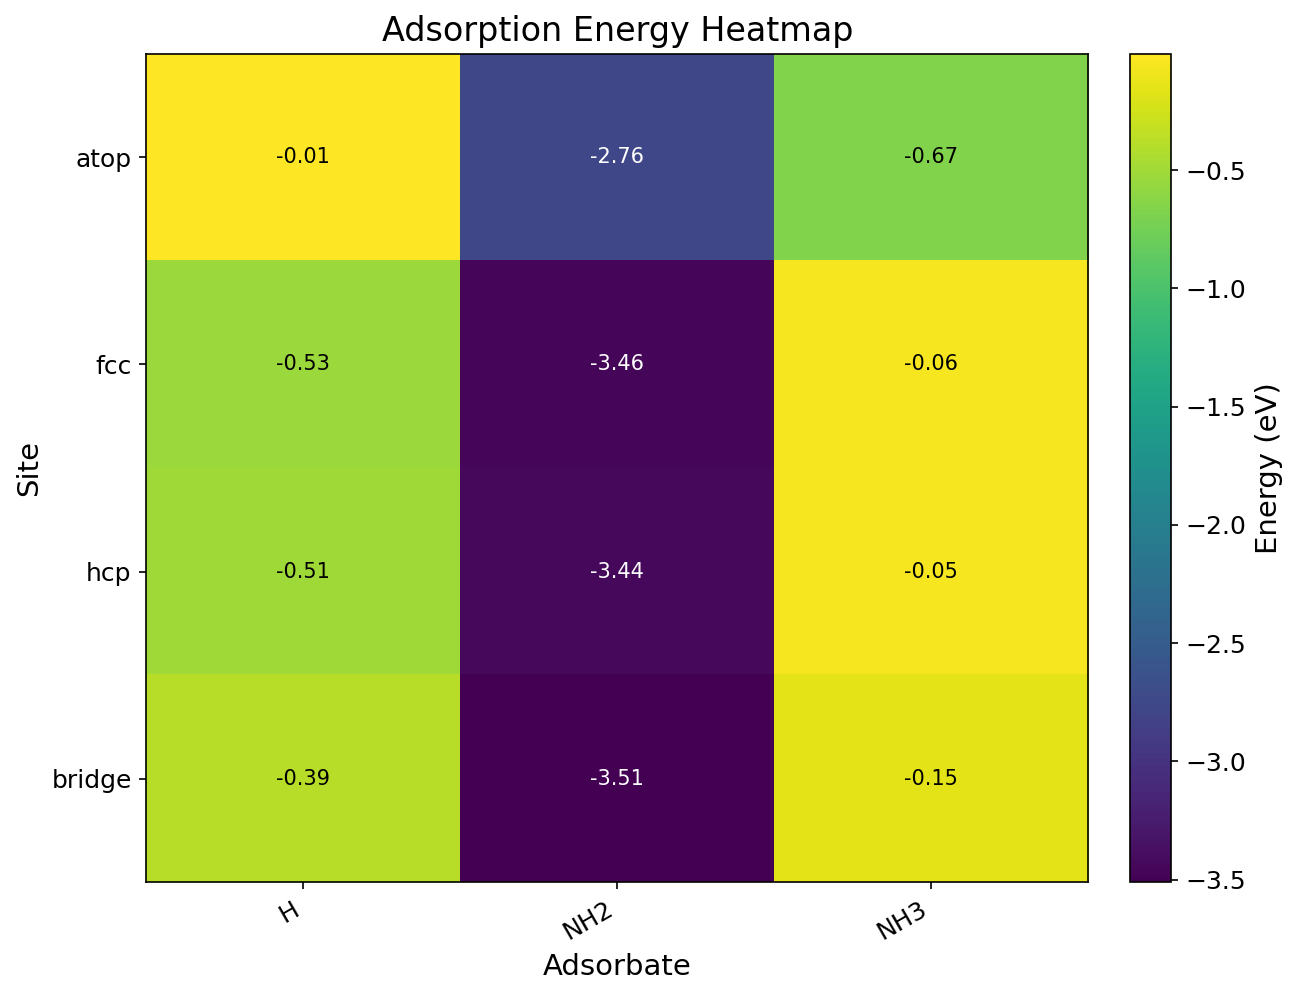

In [7]:
# ---- Visualize adsorption energies as a heatmap ------------------------------
# Uses the helper from utility.py to build a site×molecule matrix and plot it.
# By default the colormap reflects absolute energies (eV); each cell is also
# annotated with the numeric value for quick reading.

fig, ax = plot_adsorption_heatmap(
    adsorption_results,
    figsize=(8.8, 6.8),   # wide enough for multiple molecules and long site lists
)

plt.show()  # render in the notebook

## 8) NEB Pathway: NH₃* → NH₂* + H* on Co(0001)

**Objective:**  
Build a **minimum energy path (MEP)** between the best NH₃* initial state and a final state with NH₂* + H* on their preferred sites, then run NEB.

**Steps:**  
1. Select **preferred sites** for NH₃, NH₂, H from screening results  
2. Prepare **initial** (NH₃*) and **final** (NH₂* + H*) endpoints and relax them  
3. Create a band of images (**IDPP interpolation**)  
4. Run a two-stage NEB:  
   - Plain NEB to approach MEP  
   - **Climbing-image NEB** to refine the transition state  
5. Collect image energies, barriers, and reaction energy

**Outputs:**  
- Relative energies along the band  
- Forward/reverse barriers and net reaction energy


In [8]:
print("Setting up NEB calculation for NH3 -> NH2 + H reaction...")

# Preferred adsorption sites to assemble well-defined end states
PREFERRED_SITES = {
    "NH3": "atop",
    "NH2": "bridge",
    "H":   "fcc",
}

# --- Build INITIAL state: NH3* on preferred site --------------------------------
nh3_best_site, nh3_best_rec = pick_site_by_name(
    adsorption_results.get("NH3", {}), PREFERRED_SITES["NH3"], "NH3"
)

# Copy the relaxed slab+NH3 structure and reapply bottom-layer constraint
initial_state = nh3_best_rec["structure"].copy()
initial_state.set_constraint(slab_constraint)

# --- Build FINAL state: NH2* + H* on their preferred sites ---------------------
nh2_best_name, nh2_best_rec = pick_site_by_name(
    adsorption_results.get("NH2", {}), PREFERRED_SITES["NH2"], "NH2"
)
h_best_name, h_best_rec = pick_site_by_name(
    adsorption_results.get("H",   {}), PREFERRED_SITES["H"],   "H"
)

# Start from a clean slab; then append relaxed adsorbate fragments
final_state = slab.copy()
ref_len = len(slab)  # index where adsorbate atoms start in slab+ads structures

# Extract only the adsorbate atoms from the saved structures (skip slab atoms)
nh2_ads = nh2_best_rec["structure"][ref_len:].copy()
h_ads   = h_best_rec["structure"][ref_len:].copy()

final_state.extend(nh2_ads)
final_state.extend(h_ads)
final_state.set_pbc([True, True, True])
final_state.wrap()
final_state.set_constraint(slab_constraint)

print(f"  Initial: NH3 on {nh3_best_site}")
print(f"  Final:   NH2 on {nh2_best_name} + H on {h_best_name}")

# --- Endpoint relaxations (ensure consistent calculators & constraints) --------
print("\nRelaxing endpoints...")

print("\nInitial State NH3:")
# Rebuild an OC20 calculator bound to the shared predictor (same as oc20_calculator)
initial_state.calc = FAIRChemCalculator(predictor, task_name="oc20")
LBFGS(initial_state).run(fmax=0.02, steps=300)

print("\nFinal State NH2+H:")
final_state.calc = FAIRChemCalculator(predictor, task_name="oc20")
LBFGS(final_state).run(fmax=0.02, steps=300)

# Absolute endpoint energies (used later for reaction energy and barrier refs)
E0 = initial_state.get_potential_energy()
Ef = final_state.get_potential_energy()
print(
    f"\n  E_initial = {E0:.3f} eV"
    f"\n  E_final   = {Ef:.3f} eV"
    f"\n  E_rxn     = {Ef - E0:+.3f} eV"
)

# --- Build the NEB band --------------------------------------------------------
n_images = 7  # total number of images including endpoints (odd is common)
print(f"Creating NEB band with {n_images} images...")

# Images list: [initial, intermediates..., final]
images = [initial_state]
for _ in range(n_images - 2):
    img = initial_state.copy()              # placeholder; IDPP will morph them
    img.set_constraint(slab_constraint)     # keep bottom layers fixed in each image
    images.append(img)
images.append(final_state)

# IDPP: generate a good initial path between endpoints before NEB optimization
idpp_interpolate(images)

# Attach calculators to all images (consistent potential across band)
for img in images:
    img.calc = FAIRChemCalculator(predictor, task_name="oc20")

# --- NEB Stage 1: locate MEP (no climbing) ------------------------------------
print("Stage 1: Plain NEB (locating MEP)...")
neb = NEB(images, climb=False)  # standard NEB to approach the minimum-energy path
FIRE(neb).run(fmax=0.2, steps=1000)  # looser fmax for initial MEP convergence

# --- NEB Stage 2: refine TS with climbing-image NEB ---------------------------
print("Stage 2: Climbing-image NEB (refining TS)...")
neb.climb = True                # convert the highest-energy image to a "climber"
FIRE(neb).run(fmax=0.02, steps=1000)

# Collect absolute energies of all images and identify the TS
energies = np.array([img.get_potential_energy() for img in images])
rel = (energies - energies[0]).tolist()         # relative to initial (eV)
ts_index = int(np.argmax(energies))             # index of the highest-energy image

# Barriers: forward (from initial) and reverse (from final)
Ea_fwd = energies[ts_index] - energies[0]
Ea_rev = energies[ts_index] - energies[-1]

print(
    f"\n{'=' * 80}"
    f"\nNEB RESULTS"
    f"\n{'=' * 80}"
    f"\nRelative energies (eV): {[round(x, 3) for x in rel]}"
    f"\nForward barrier Ea = {Ea_fwd:.3f} eV (TS image #{ts_index + 1}/{len(images)})"
    f"\nReverse barrier Ea = {Ea_rev:.3f} eV (TS image #{ts_index + 1}/{len(images)})"
    f"\nReaction energy  = {energies[-1] - energies[0]:+.3f} eV"
    f"\n{'=' * 80}"
)

Setting up NEB calculation for NH3 -> NH2 + H reaction...
  Initial: NH3 on atop
  Final:   NH2 on bridge + H on fcc

Relaxing endpoints...

Initial State NH3:
       Step     Time          Energy          fmax
LBFGS:    0 02:35:04     -496.125523        0.078052
LBFGS:    1 02:35:06     -496.125827        0.030256
LBFGS:    2 02:35:07     -496.126134        0.056826
LBFGS:    3 02:35:08     -496.126353        0.052410
LBFGS:    4 02:35:09     -496.126616        0.042485
LBFGS:    5 02:35:11     -496.126778        0.026594
LBFGS:    6 02:35:12     -496.126952        0.051855
LBFGS:    7 02:35:13     -496.127186        0.064804
LBFGS:    8 02:35:14     -496.127433        0.044947
LBFGS:    9 02:35:15     -496.127577        0.028722
LBFGS:   10 02:35:17     -496.127644        0.026880
LBFGS:   11 02:35:18     -496.127696        0.039690
LBFGS:   12 02:35:19     -496.127761        0.037984
LBFGS:   13 02:35:20     -496.127812        0.019840

Final State NH2+H:
       Step     Time       

## 9) Plot NEB Energy Diagram and Inspect Key Structures

**Objective:**  
Present a compact energy-level diagram and visualize the **initial**, **TS**, and **final** structures.

**What you see:**  
- Annotated forward barrier (Ea_fwd), reverse barrier (Ea_rev), and reaction energy (ΔE)  
- NGLView previews for: initial (NH₃*), transition state, and final (NH₂* + H*)

**Use it for:**  
Clear storytelling of the NH₃ dissociation mechanism and energetics on Co(0001).


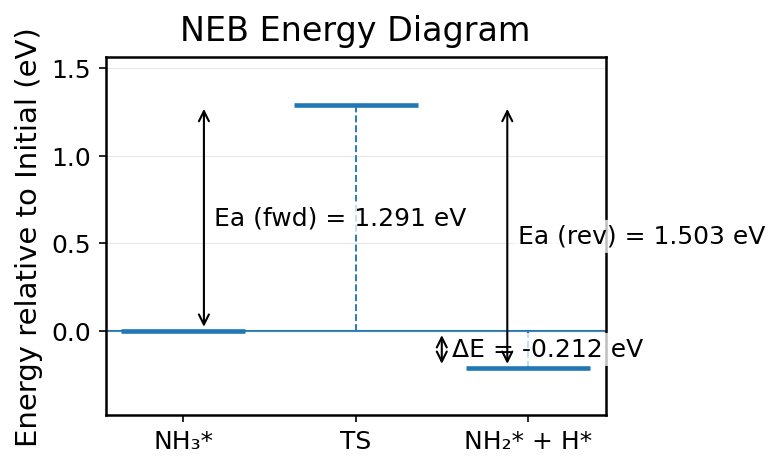

E0  = -496.128 eV
Ets = -494.837 eV
Ef  = -496.339 eV
Ea_fwd = 1.291 eV,  Ea_rev = 1.503 eV,  ΔE = -0.212 eV
Initial State Structure:

Optimized structure saved as './NEB_Files/Initial_state.vasp'


NGLWidget(layout=Layout(height='600px', width='100%'))

Transition State Structure:

Optimized structure saved as './NEB_Files/TS_state.vasp'


NGLWidget(layout=Layout(height='600px', width='100%'))

Final State Structure:

Optimized structure saved as './NEB_Files/Final_state.vasp'


NGLWidget(layout=Layout(height='600px', width='100%'))

In [9]:
# --- Plot NEB energy diagram ---------------------------------------------------
# Draw a compact three-level diagram (Initial, TS, Final) from the NEB energies.
# The helper also returns a dict with key energies so we can print them cleanly.
fig, ax, values = plot_neb_energy_diagram(
    energies=energies,        # absolute energies (eV) for all NEB images (0..N-1)
    ts_index=ts_index,        # index of the highest-energy image (the TS)
    initial_label="NH₃*",     # label shown under the Initial level
    ts_label="TS",            # label shown under the Transition State level
    final_label="NH₂* + H*",  # label shown under the Final level
)

# Report absolute endpoints and derived quantities (all in eV)
print(f"E0  = {values['E0']:.3f} eV")        # Initial state's absolute energy
print(f"Ets = {values['Ets']:.3f} eV")       # TS absolute energy
print(f"Ef  = {values['Ef']:.3f} eV")        # Final state's absolute energy
print(                                       # Barriers and reaction energy
    f"Ea_fwd = {values['Ea_fwd']:.3f} eV,  " # Forward barrier  = Ets - E0
    f"Ea_rev = {values['Ea_rev']:.3f} eV,  " # Reverse barrier  = Ets - Ef
    f"ΔE = {values['dE']:+.3f} eV"           # Reaction energy  = Ef  - E0
)
# (Tip) if you also want kJ/mol, multiply any eV value by 96.48533212.

# ---- Structures ---------------------------------------------------------------
# Quick visual sanity checks for the endpoints and TS geometry.
ts_image = images[ts_index]  # NEB image identified as the TS

print("Initial State Structure:")
# --- Save the relaxed initial state structure
output_dir = f"./NEB_Files/"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_file = os.path.join(output_dir, "Initial_state.vasp")  # VASP POSCAR-format
write(output_file, initial_state, format="vasp", direct=True, vasp5=True)
print(f"\nOptimized structure saved as '{output_file}'")

display(view_structure_ngl(
    initial_state,
    title=f"Initial: NH₃ on {nh3_best_site}"
))

print("Transition State Structure:")
# --- Save the relaxed TS state structure
output_dir = f"./NEB_Files/"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_file = os.path.join(output_dir, "TS_state.vasp")  # VASP POSCAR-format
write(output_file, ts_image, format="vasp", direct=True, vasp5=True)
print(f"\nOptimized structure saved as '{output_file}'")

display(view_structure_ngl(
    ts_image,
    title=f"Transition State (image {ts_index+1})"
))

print("Final State Structure:")
output_dir = f"./NEB_Files/"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_file = os.path.join(output_dir, "Final_state.vasp")  # VASP POSCAR-format
write(output_file, final_state, format="vasp", direct=True, vasp5=True)
print(f"\nOptimized structure saved as '{output_file}'")

display(view_structure_ngl(
    final_state,
    title=f"Final: NH₂ on {nh2_best_name} + H on {h_best_name}"
))

## Conclusion:

* Our UMA/ASE workflow reproduced the **expected site preferences** on Co(0001): NH₃ atop; H in hollow; NH₂ stable at multi-fold sites.
* The NEB for **NH₃* → NH₂* + H*** gives: E_fwd = 1.284 eV (≈124 kJ·mol⁻¹), E_rev = 1.496 eV ( ≈144 kJ·mol⁻¹), ΔE=-0.212 eV ( ≈–20 kJ·mol⁻¹).
* These follow the **literature trend** despite the lack of ZPE correction: the first N–H scission has the **largest barrier**, exceeding NH₃ adsorption energy; subsequent steps are typically easier. Small quantitative differences are expected given an ML potential, and coverage/site choices.
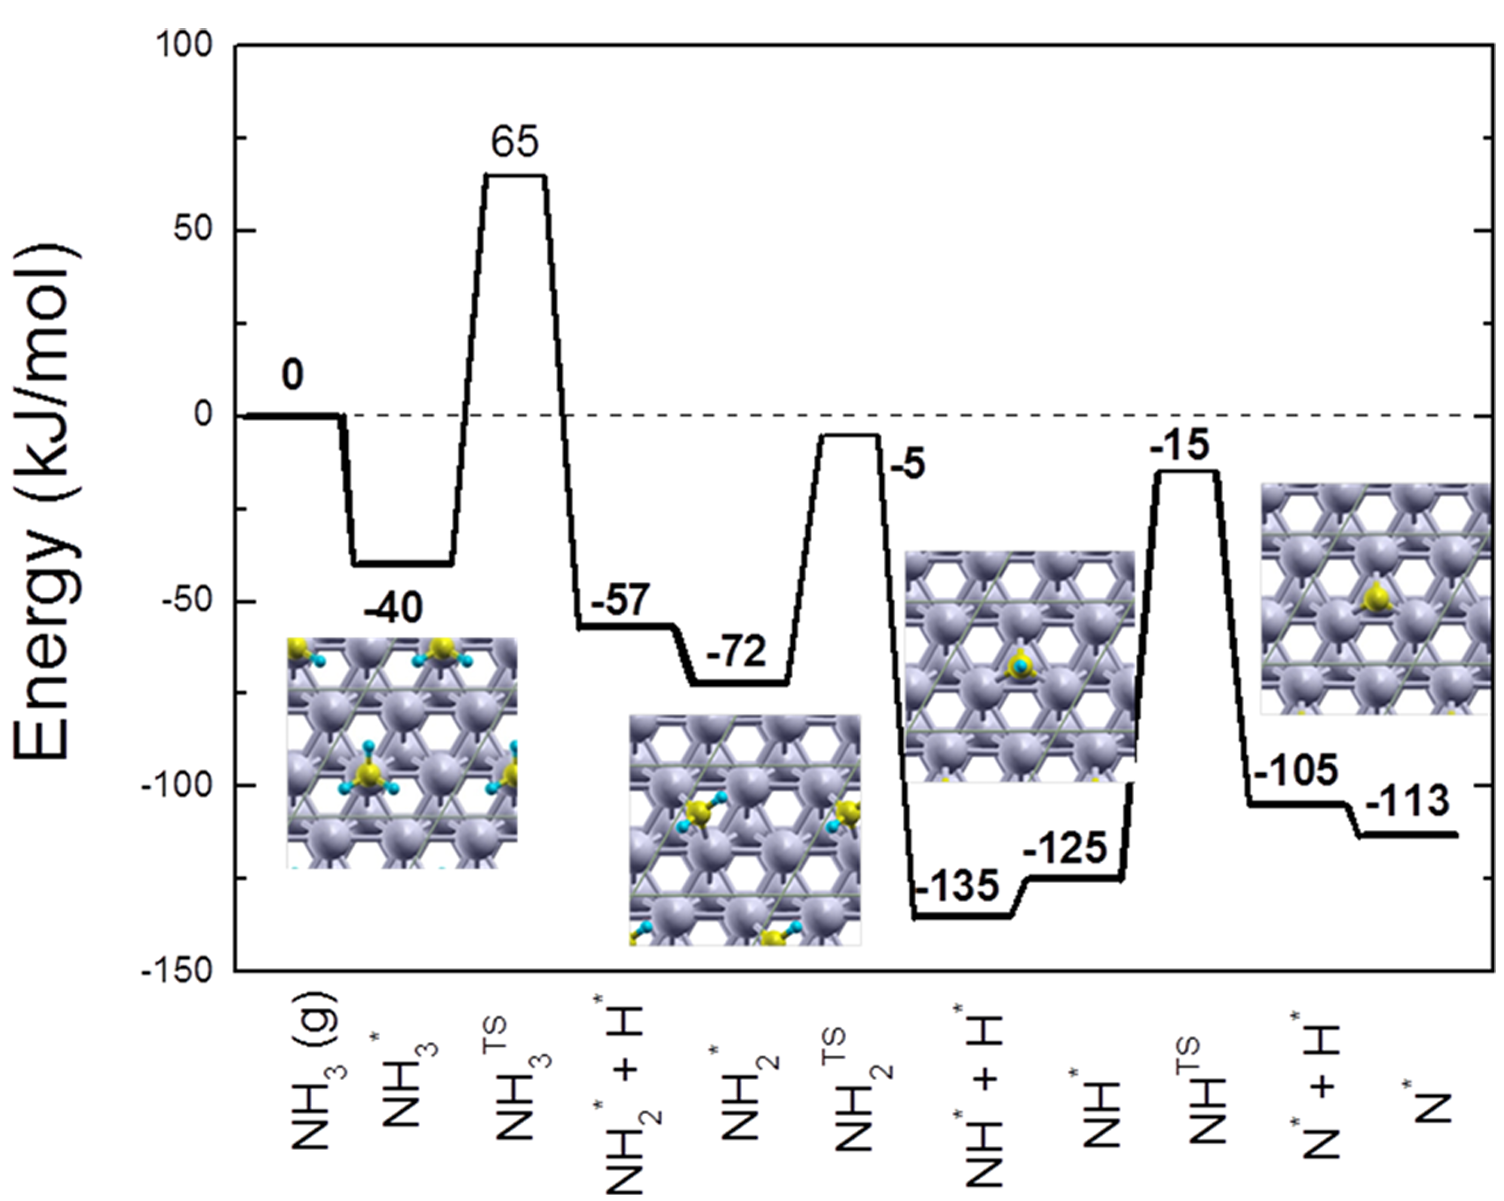

**Reference:**
Kizilkaya, Niemantsverdriet & Weststrate, *J. Phys. Chem. C* **120** (2016) 3834–3845. [https://doi.org/10.1021/acs.jpcc.5b11609](https://doi.org/10.1021/acs.jpcc.5b11609)

## References

- **FairChem / UMA (Open Catalyst Project, FAIR-Chemistry)** — model zoo and docs:  
  https://fair-chem.github.io/  
  https://github.com/FAIR-Chem/fairchem

- **OC20 / OC22 Datasets & Benchmarks** — catalyst-adsorbate datasets used to train UMA-style models:  
  https://opencatalystproject.org/  
  https://github.com/FAIR-Chem/ocp

- **ASE (Atomic Simulation Environment)** — building crystals, slabs, optimizers, NEB:  
  https://wiki.fysik.dtu.dk/ase/  

- **NGLView** — interactive molecular visualization in Jupyter:  
  https://nglviewer.org/nglview/latest/

- **Surface Energy Background**  
  Vitos et al., *Surface energy of metals from first-principles*, Surf. Sci. 411 (1998): https://doi.org/10.1016/S0039-6028(98)00363-X
